# Tarea - Ajuste de curvas

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [43]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

---

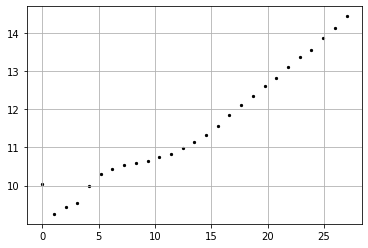

In [44]:
x=np.linspace(0,27,27)
y=data
plt.scatter(x,y,c='k',s=5)
plt.grid()

In [45]:
def f(beta,x,n):
    X=[x**i for i in range(n+1)]
    return np.dot(beta,X)

In [46]:
#Criterio de optimización (mínimos cuadrados)
def fun(beta,x,y,n):
    return np.sum((y-f(beta,x,n))**2)

In [47]:
n=1
beta0=np.random.rand(n+1)
sol1=opt.minimize(fun,beta0,args=(x,y,n))
sol1

      fun: 2.3704889518145684
 hess_inv: array([[ 0.07010581, -0.00382128],
       [-0.00382128,  0.00028306]])
      jac: array([-5.36441803e-06,  1.49011612e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.11567596, 0.17975685])

In [48]:
n=2
beta0=np.random.rand(n+1)
sol2=opt.minimize(fun,beta0,args=(x,y,n))
sol2

      fun: 0.844384520111897
 hess_inv: array([[ 1.44225513e-01, -2.09511655e-02,  6.34440139e-04],
       [-2.09511655e-02,  4.24196430e-03, -1.46626162e-04],
       [ 6.34440139e-04, -1.46626162e-04,  5.43059856e-06]])
      jac: array([9.68575478e-08, 3.72529030e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.59128445e+00, 6.98385141e-02, 4.07104872e-03])

In [49]:
n=3
beta0=np.random.rand(n+1)
sol3=opt.minimize(fun,beta0,args=(x,y,n))
sol3

      fun: 0.8404404635157889
 hess_inv: array([[ 2.27125515e-01, -6.17244877e-02,  4.48273837e-03,
        -9.50264458e-05],
       [-6.17244877e-02,  2.42948898e-02, -2.03915869e-03,
         4.67282965e-05],
       [ 4.48273837e-03, -2.03915869e-03,  1.84037874e-04,
        -4.40989017e-06],
       [-9.50264458e-05,  4.67282965e-05, -4.40989017e-06,
         1.08881989e-07]])
      jac: array([ 7.45058060e-09,  1.04308128e-07, -2.75671482e-07, -1.83284283e-06])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 12
     njev: 20
   status: 0
  success: True
        x: array([9.56775710e+00, 8.13988586e-02, 2.98020670e-03, 2.69343699e-05])

In [50]:
sol=[0,0,0] #np.ones(3)
for i in range(3):
    beta0=np.random.rand(i+2)
    sol[i]=opt.minimize(fun,beta0,args=(x,y,i+1))

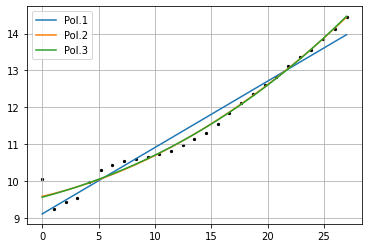

In [51]:
plt.scatter(x,y,s=5,c='k')
for i in range(3):
    plt.plot(x,f(sol[i].x,x,i+1),label='Pol.'+str(i+1))
plt.legend(loc='best')
plt.grid()

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [52]:
data=pd.read_csv('population_data.csv')
data.head()

,Año,Poblacion,Nacimientos,Muertes
0,1950,28296000,1174947,418430
1,1951,29110000,1183788,458238
2,1952,29980000,1195209,408823
3,1953,30904000,1261775,446127
4,1954,31880000,1339837,378752


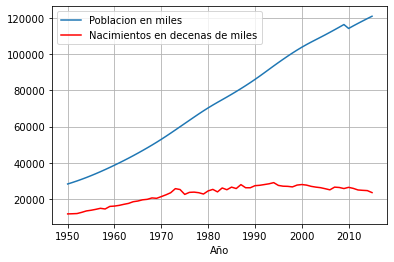

In [53]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/100,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

In [1]:
x=data['A']/1000
y=data['Poblacion']/1000000
plt.scatter(x,y,c='r',s=5)
plt.grid()

NameError: name 'data' is not defined

In [55]:
def f(beta,x,n):
    X=[x**i for i in range(n+1)]
    return np.dot(beta,X)

In [56]:
#Criterio de optimización (mínimos cuadrados)
def fun(beta,x,y,n):
    return np.sum((y-f(beta,x,n))**2)

In [57]:
sol=[0,0,0] 
for i in range(3):
    beta0=np.random.rand(i+2)
    sol[i]=opt.minimize(fun,beta0,args=(x,y,i+1))

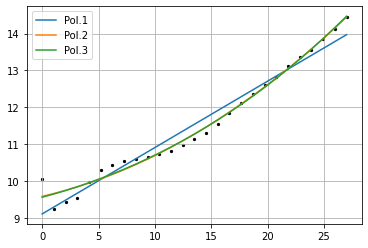

In [58]:
plt.scatter(x,y,s=5,c='k')
for i in range(3):
    plt.plot(x,f(sol[i].x,x,i+1),label='Pol.'+str(i+1))
plt.legend(loc='best')
plt.grid()

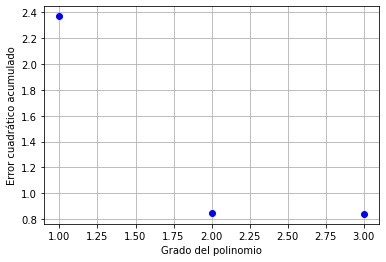

In [59]:
#Error cuadrático acumulado

for i in range(3):
    plt.plot(i+1,sol[i].fun,'ob')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [60]:
for i in range(3):
    print(sol[i].x)

[9.11567617 0.17975684]
[9.59128444e+00 6.98385154e-02 4.07104868e-03]
[9.56775710e+00 8.13988607e-02 2.98020644e-03 2.69343777e-05]


---
**Respuesta:**
El polinomio que mejor se ajusta es el de grado 2 por su similtud con los puntos, porque mantiene un error medio entre los otros 2 polinomios y porque sus coeficientes tienen una mejor relación

---
Repitiendo todo, ahora con los nacimientos

ValueError: x and y must be the same size

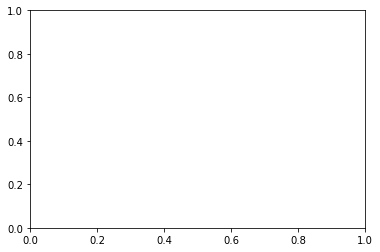

In [34]:
y=data['Nacimientos']/100000
plt.scatter(x,y,c='r',s=5)
plt.grid()

In [35]:
def f(beta,x,n):
    X=[x**i for i in range(n+1)]
    return np.dot(beta,X)

In [36]:
#Criterio de optimización (mínimos cuadrados)
def fun(beta,x,y,n):
    return np.sum((y-f(beta,x,n))**2)

In [37]:
sol=[0,0,0] #np.ones(3)
for i in range(3):
    beta0=np.random.rand(i+2)
    sol[i]=opt.minimize(fun,beta0,args=(x,y,i+1))

ValueError: operands could not be broadcast together with shapes (66,) (27,) 

ValueError: x and y must be the same size

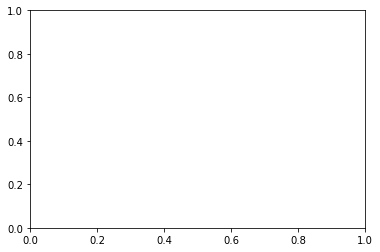

In [38]:
plt.scatter(x,y,s=5,c='k')
for i in range(3):
    plt.plot(x,f(sol[i].x,x,i+1),label='Pol.'+str(i+1))
plt.legend(loc='best')
plt.grid()

In [39]:
#Error cuadrático acumulado

for i in range(3):
    plt.plot(i+1,sol[i].fun,'ob')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

AttributeError: 'int' object has no attribute 'fun'

In [40]:
for i in range(3):
    print(sol[i].x)

AttributeError: 'int' object has no attribute 'x'

---
**Respuesta:**
El polinomio que mejor se adapta es el de grado 3 ya que se ajusta mejor a sus puntos y tiene un menor error.

---
Realicé una prueba para estimar los nacimientos en el año 2015 y comprararlo con el real

In [41]:
a=2015-1950
for i in range(3):
    print(f(sol[i].x,a,i+1))

AttributeError: 'int' object has no attribute 'x'

El que mejor lo estimó fue el de grado 2